In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from pathlib import Path

In [2]:
def load_data(folder_path):
    root_folder = folder_path

    #filenames = []
    text_data = [] # Replace with the text data
    labels = [] # Replace with the corresponding labels (0 or 1)

    for subfolder in os.listdir(root_folder):
        subfolder_path = os.path.join(root_folder, subfolder)

        if subfolder == 'fitzgerald':
            label = 0
        else:
            label = 1

        for file in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, file)
            print("Processing file:", file)
            with open(file_path, 'r', encoding="utf-8") as f:
                text = f.read()
            #filenames.append(file_path)
            text_data.append(text)
            labels.append(label)
    return text_data, labels

In [9]:
up_dir = Path.cwd().parent
data_dir = up_dir.joinpath("data")
data_dir

PosixPath('/Users/spicy.kev/Documents/github/fitzgerald_hemingway/data')

In [11]:
text_data, labels = load_data(data_dir)
df = pd.DataFrame(list(zip(text_data, labels)), columns=['text_data', 'label'])

X = df['text_data']
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Processing file: hemingway_collected_stories.txt
Processing file: hemingway_bell_tolls.txt
Processing file: hemingway_ten_poems.txt
Processing file: hemingway_sun_also.txt
Processing file: hemingway_in_our_time.txt
Processing file: hemingway_green_hills_africa.txt
Processing file: hemingway_across_the_river.txt
Processing file: hemingway_winner_take_nothing.txt
Processing file: hemingway_old_man.txt
Processing file: hemingway_farewell.txt
Processing file: hemingway_men_without_women.txt
Processing file: fitzgerald_flappers_and_philosophers.txt
Processing file: fitzgerald_tender_is.txt
Processing file: fitzgerald_bablyon_revisited.txt
Processing file: fitzgerald_gatsby.txt
Processing file: fitzgerald_beautiful_and_damned.txt
Processing file: fitzgerald_the_vegtable.txt
Processing file: fitzgerald_tales_jazz_age.txt
Processing file: fitzgerald_this_side.txt
Processing file: fitzgerald_all_the_sad.txt


In [12]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, target_names=['fitzgerald', 'hemingway']))

accuracy 1.0
              precision    recall  f1-score   support

  fitzgerald       1.00      1.00      1.00         2
   hemingway       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



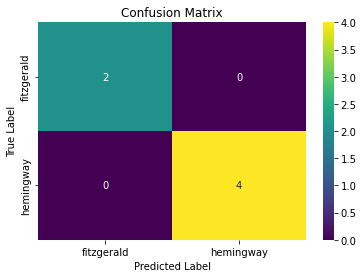

In [13]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# create a list of class labels
classes = ['fitzgerald', 'hemingway']

# plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=classes, yticklabels=classes)

# add axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [17]:
feature_names = logreg.named_steps['vect'].get_feature_names_out()
coefficients = logreg.named_steps['clf'].coef_[0]

In [18]:
feature_importance = list(zip(feature_names, coefficients))
feature_importance.sort(key=lambda x: abs(x[1]), reverse=True)

In [35]:
feature_importance

[('the', 19.785448122838254),
 ('of', -17.04515104348003),
 ('said', 14.945131017797703),
 ('her', -14.176598816964212),
 ('she', -13.821362547137431),
 ('to', -9.787672574769987),
 ('amory', -9.425270906394415),
 ('his', -7.930392899130639),
 ('gatsby', -7.649215317201168),
 ('that', -7.520082393765993),
 ('dick', -6.0463050830693845),
 ('it', 5.711363341910112),
 ('jerry', -5.43747230661058),
 ('daisy', -5.4097112129255445),
 ('colonel', 5.3958063864105865),
 ('fontan', 5.146471368461749),
 ('for', -5.135265949884683),
 ('they', 5.1140086921424475),
 ('had', -5.098690341171085),
 ('we', 5.038527052509724),
 ('in', -4.6824514394784815),
 ('charlotte', -4.632993763101639),
 ('nicole', -4.4511490582413895),
 ('brett', 4.370888510976533),
 ('bull', 4.325765461369536),
 ('doris', -4.118216678312563),
 ('as', -4.110172768473052),
 ('he', -3.9394520907479675),
 ('not', 3.914665127746345),
 ('tom', -3.872034697331595),
 ('an', -3.721757496823154),
 ('with', -3.641307599240903),
 ('rosemary',

In [21]:
df = pd.DataFrame(feature_importance)
len(df)

25326

In [30]:
feature_names = logreg.named_steps['vect'].get_feature_names_out()
coefficients = logreg.named_steps['clf'].coef_[0]

# Create a list of tuples with the feature name and its coefficient
feature_importance = list(zip(feature_names, coefficients))

# Sort the feature importance list based on the absolute value of the coefficients
feature_importance.sort(key=lambda x: abs(x[1]), reverse=True)

# Create a dataframe from the sorted list of tuples
df = pd.DataFrame(feature_importance, columns=['feature_name', 'coefficient'])

# Display the first few rows of the sorted dataframe
df.head(50)

/Users/spicy.kev/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,feature_name,coefficient
0,the,19.785448
1,of,-17.045151
2,said,14.945131
3,her,-14.176599
4,she,-13.821363
5,to,-9.787673
6,amory,-9.425271
7,his,-7.930393
8,gatsby,-7.649215
9,that,-7.520082


In [34]:
import pandas as pd

feature_names = logreg.named_steps['vect'].get_feature_names_out()
coefficients = logreg.named_steps['clf'].coef_[0]

# Create a dataframe with the feature names and coefficients
df = pd.DataFrame({'feature_name': feature_names, 'coefficient': coefficients})

# Add a column with the absolute value of the coefficients
df['abs_coefficient'] = abs(df['coefficient'])

# Sort the dataframe by the absolute value of the coefficients in descending order
df = df.sort_values('abs_coefficient', ascending=False)

# Reset the index of the dataframe
df = df.reset_index(drop=True)

# Display the first few rows of the sorted dataframe
df.head(50)

,feature_name,coefficient,abs_coefficient
0,the,19.785448,19.785448
1,of,-17.045151,17.045151
2,said,14.945131,14.945131
3,her,-14.176599,14.176599
4,she,-13.821363,13.821363
5,to,-9.787673,9.787673
6,amory,-9.425271,9.425271
7,his,-7.930393,7.930393
8,gatsby,-7.649215,7.649215
9,that,-7.520082,7.520082
